In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# load dataset
matches = pd.read_csv('/content/IPL_Matches.csv')
deliveries = pd.read_csv('/content/IPL_deliveries.csv')

In [ ]:
# data check
print('Matches dataset shape:',matches.shape)
print('Diliveries dataset shape:',deliveries.shape)

print('\nMatches head:')
print(matches.head())

print('\nDeliveries head:')
print(deliveries.head())

# info about datatypes and nulls

print('\nMatches info:')
print(matches.info())

print('\nDeliveries info:')
print(deliveries.info())

# describe numric columns

print('\nMatches describe:')
print(matches.describe())

print('\nDeliveries describe:')
print(deliveries.describe())

# convert some columns into numpy arrays

runs_array = deliveries['total_runs'].to_numpy()
wickets_array = deliveries['player_dismissed'].notna().astype(int).to_numpy()

# numpy basic operations

print('\nNumPy checks:')
print('Total runs (sum):,runs_array.sum()')
print('Average runs per balls:',runs_array.mean())
print('Maximum runs in a single ball:',runs_array.max())
print('Total Wickets (sum):', wickets_array.sum())

# boolean masking example : how many balls had 6 runs
print('Number of sixes', np.sum(runs_array == 6))

#fancy indexing example : first 10 runs
print('First 10 runs entries:', runs_array[:10])


Matches dataset shape: (636, 18)
Diliveries dataset shape: (150460, 21)

Matches head:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied              

In [ ]:
# basic EDA

# maxim numuber of matches in city
print('\nTop 5 cities by number of matches:')
print(matches['city'].value_counts().head())

# teams with most number of matches
print('\nTeams wwith most toss wins:')
print(matches['toss_winner'].value_counts().head())

# teams with most match wins
print('\nTeams with most match wins:')
print(matches['winner'].value_counts().head())

# merge matches + diliveries
merged = deliveries.merge(matches,left_on= 'match_id',right_on= 'id')
print('Merged dataset shape:', merged.shape)
print(merged.head())

#top 5 bolwers by wickets

print('\nTop 5 bolwers by wickets:')
print(deliveries[deliveries['player_dismissed'].notna()].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head())




Top 5 cities by number of matches:
city
Mumbai       85
Bangalore    66
Kolkata      61
Delhi        60
Hyderabad    49
Name: count, dtype: int64

Teams wwith most toss wins:
toss_winner
Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Name: count, dtype: int64

Teams with most match wins:
winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Name: count, dtype: int64
Merged dataset shape: (150460, 39)
   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hy

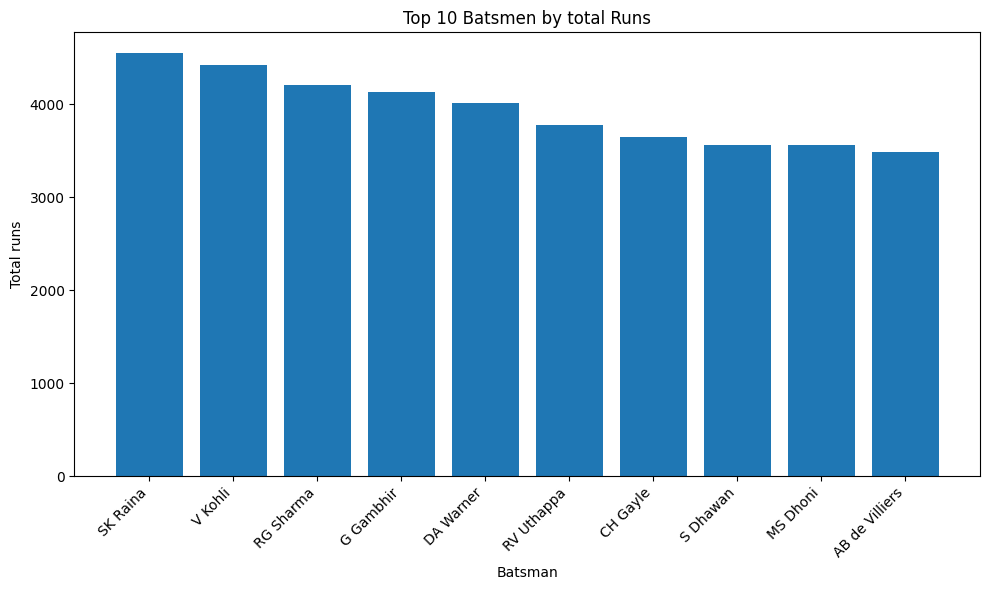

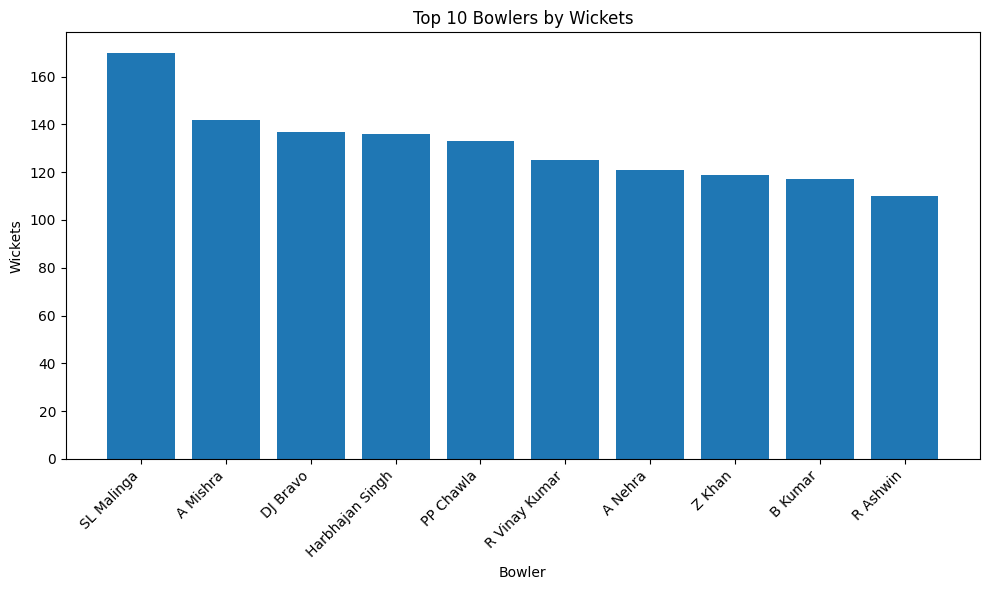

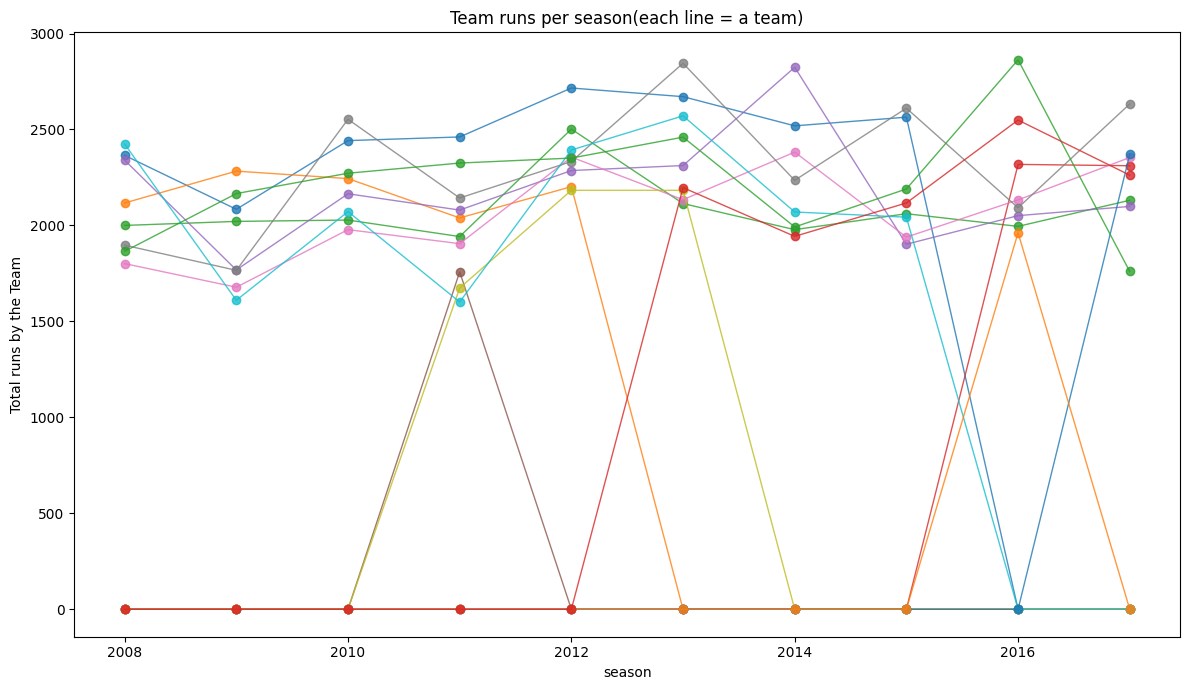

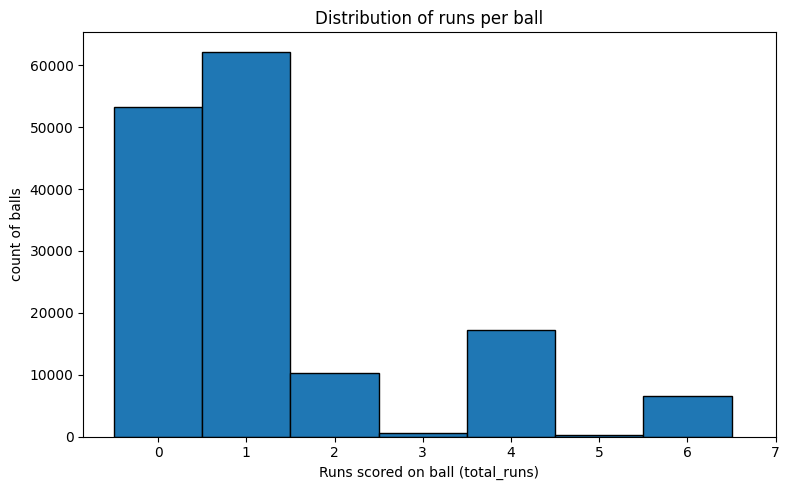

In [ ]:
import matplotlib.pyplot as plt

# top 10 batsmen by total runs
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending= False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_batsmen.index,top_batsmen.values)
plt.xticks(rotation=45, ha= "right")
plt.xlabel('Batsman')
plt.ylabel('Total runs')
plt.title('Top 10 Batsmen by total Runs')
plt.tight_layout()
plt.savefig('top10_batsmen_bar.png')
plt.show()

# top 10 bolwers by wickets

top_bowlers = deliveries[deliveries['player_dismissed'].notna()].groupby('bowler')['player_dismissed'].count().sort_values(ascending= False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_bowlers.index, top_bowlers.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.title('Top 10 Bowlers by Wickets')
plt.tight_layout()
plt.savefig('top10_bowlers_bar.png')
plt.show()

# team runs per season

team_season = merged.groupby(['season','batting_team'])['batsman_runs'].sum().reset_index()
pivot = team_season.pivot(index='season',columns='batting_team',values='batsman_runs').fillna(0)

plt.figure(figsize=(12,7))
for col in pivot.columns:
  plt.plot(pivot.index,pivot[col],marker='o',linewidth=1,alpha=0.8)
plt.xlabel('season')
plt.ylabel('Total runs by the Team')
plt.title('Team runs per season(each line = a team)')
plt.tight_layout()
plt.savefig('team_runs_per_season_line.png',bbox_inches='tight')
plt.show()

# distribustion of runs per ball
plt.figure(figsize=(8,5))
plt.hist(deliveries['total_runs'],bins= range(0,8),edgecolor='black',align='left')
plt.xticks(range(0,8))
plt.xlabel('Runs scored on ball (total_runs)')
plt.ylabel('count of balls')
plt.title('Distribution of runs per ball')
plt.tight_layout()
plt.savefig('runs_per_ball_hist.png')
plt.show()

